# Scoping Data Variation

`04` generated the dataset for CitiBike's most active day of the year so far. In `05` let's examine the variability of that data, and try to get counts for each station.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
june_22 = pd.read_csv("../data/part_2/citibike_trips_on_june_22_2016.csv", index_col=0)

In [3]:
len(june_22)

55749

Hmm. Polylines for that would take up more space then I could get out of a free mlab instance. Will need to come up with something. In the short term this means that I will just store thing in a local database, to try and get a sense of the data store size requirements.

(it would also take a week+ to geocode all that, but whatever)

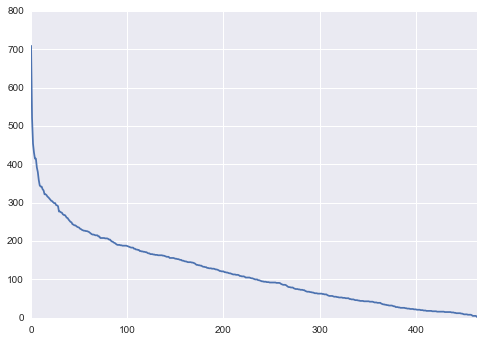

In [12]:
june_22['start station id'].value_counts().reset_index(drop=True).plot()

A station can have as many as 700 trips, and as few as only 1.

**Least active**

In [23]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[-1]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1030850,Yankee Ferry Terminal,40.686931,-74.016966


A station on Governer's Island.

In [25]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[-2]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1008023,Lewis Ave & Decatur St,40.68146,-73.934903


Easternmost bike rack, edge of the Brooklyn deployment near Fulton Street.

In [26]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[-3]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1020884,31 St & Thomson Ave,40.744697,-73.935404


Northernmost in Brooklyn, in LIC.

In [27]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[-4]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1005574,Albany Ave & Fulton St,40.680011,-73.938475


Same as number 2.

And so on...

What are the most active ones?

In [28]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[0]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1004903,Pershing Square North,40.751873,-73.977706


Grand Central! Are you surprised?!?

In [29]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[1]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1004927,Broadway & E 22 St,40.740343,-73.989551


Flatiron Building! Two blocks from school (for me)! Wow.

In [30]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[2]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1004907,E 17 St & Broadway,40.73705,-73.990093


Union Square Park, just a couple of blocks down from above (boy Civic Hall is in a good place).

In [31]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[3]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1004854,Lafayette St & E 8 St,40.730287,-73.990765


A few blocks further still, the Astor Place cube.

In [32]:
june_22[june_22['start station id'] == june_22['start station id'].value_counts().index[4]][['start station name', 'start station latitude', 'start station longitude']].head(1)

,start station name,start station latitude,start station longitude
1005302,W 21 St & 6 Ave,40.74174,-73.994156


A block west of Flatiron, in front of Trader Joe's.

And so on. The trend is clear though! And interesting.

## Bikes, both in and out&mdash;counts

For the first visualization type I want all bikes coming into or going from a station.

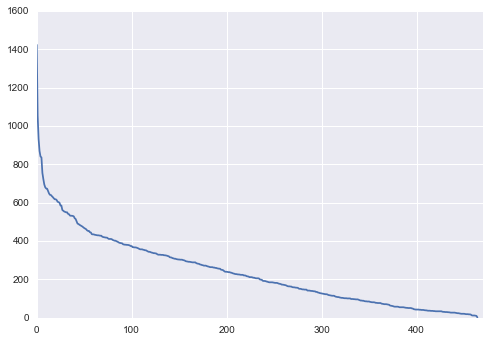

In [39]:
(june_22['start station id'].value_counts() + june_22['end station id'].value_counts()).sort_values(ascending=False).reset_index(drop=True).plot()

1400 lines is a lot of lines, but seems handle-able.

## Bikes, overall coverage&mdash;counts

How about for the second type, bikes which get ridden out of the station and end up wherever?

In [45]:
bikes = dict()
for bike_id in set(june_22['bikeid'].values):
    bikes.update({bike_id: len(june_22[june_22['bikeid'] == bike_id])})
bikes = pd.Series(bikes)

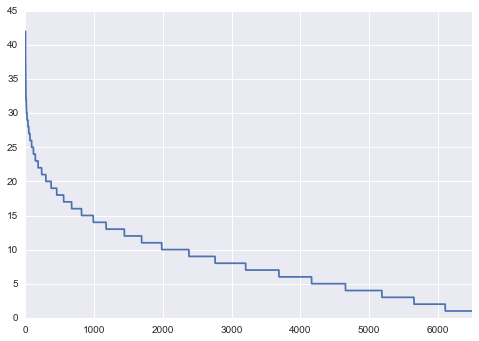

In [50]:
bikes.sort_values(ascending=False).reset_index(drop=True).plot()

Eh, that's just bikes that start in one spot and end in another. Still it seems reasonable.

## Implications

* Clearly I will need to preview these things for my audience, or else they're get bored.
* Multi-select is a necessity.
* I will need to batch a lot of polyline-reading jobs.
* Storage layer will be in terms of individual trips.
* Storage layer needs to be local first, I can export to a web datastore later.